In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
N_x = 8
N_y = 2
N = N_y * N_x
N_points = 1000
M=500

In [4]:
V_mean = np.random.randint(-10, 10, size=(N_y, N_x))


Goal: compute correlation coefficient of 

$$\frac{1}{m}\sum_{i=1}^m\Vert y_i - Vx_i\Vert$$

et

$$\frac{1}{m}\sum_{i=1}^m\Vert y_i - Vx_i\Vert^2$$

où $V \sim \mathcal N(W, \sigma^2I_N)$.

In [5]:
def test_correlation(N, N_x, N_y, M, N_points, x, y, sigma):    
    sigma = 10.0
    predictors = np.random.multivariate_normal(V_mean.reshape(N), sigma**2*np.eye(N), size=M).reshape(M, N_y, N_x)
    y_pred = predictors.dot(x.T).T
    res = y_pred - y [:, :, np.newaxis]
    res.shape
    norms = norm(res, axis=1)
    norms.shape
    assert norms.shape == (N_points, M,)
    norms_mean = norms.mean(axis=0)
    assert norms_mean.shape == (M, )
    sq_norms_mean = (norms * norms).mean(axis=0)
    var = np.vstack((norms_mean, sq_norms_mean))
    assert var.shape == (N_y, M,)
    return np.corrcoef(var)[0, 1]

In [6]:
N_points_array = np.logspace(1, 4, 5, dtype=int)

In [7]:
reps = 100

In [8]:
means = []
stds = []
sigma = 1
for N_points in N_points_array:
    print(N_points)
    x = np.random.randint(-10, 10, size=(N_points, N_x,))
    y = np.random.randint(-1, 1, size=(N_points, N_y,))
    samples = [test_correlation(N, N_x, N_y, M, N_points, x, y, sigma) for _ in range(reps)]
    means.append(np.mean(samples))
    stds.append(np.std(samples))

10
56
316
1778
10000


In [9]:
means = np.array(means)
stds = np.array(stds)

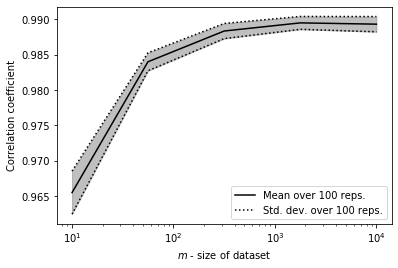

In [11]:
plt.semilogx(N_points_array, means, color="black", label=f"Mean over {reps} reps.")
plt.semilogx(N_points_array, means + stds, color="black",linestyle=":", label=f"Std. dev. over {reps} reps.")
plt.semilogx(N_points_array, means - stds, color="black",linestyle=":")
plt.fill_between(N_points_array, means - stds, means + stds, color="grey", alpha=0.5)
plt.xlabel(r"$m$ - size of dataset")
plt.ylabel("Correlation coefficient")
plt.legend()
plt.savefig("control-variate-correlation.png", dpi=400)